## EDA

### Basic Attributes

In [14]:
from PIL import Image
import pandas as pd
import os

# Set folder containing image files
ROOT = r'C:\Users\halloween\Downloads\explo'
os.chdir(ROOT)

In [15]:
files = []
for f in os.listdir():
    try:
        img = Image.open(f)
        width, height = img.size
        files.append((f, width, height))
    except:
        print(f"{f} - SKIPPED")
df = pd.DataFrame(files, columns=['Filename', 'Width', 'Height'])

# df['Width'].value_counts().head(20)
# df['Height'].value_counts().head(20)

landscape = df[df.Width - df.Height > 10].value_counts().count()
portrait = df[df.Height - df.Width > 10].value_counts().count()
square = df[abs(df.Width - df.Height) < 10].value_counts().count()
print(f"{portrait} + {landscape} + {square} = {portrait + landscape + square}")

desktop.ini - SKIPPED
mail - SKIPPED
tmp8rm58dzx - SKIPPED
yolov5s.pt - SKIPPED
70 + 25 + 217 = 312


### Inference using [YOLOv5](https://github.com/ultralytics/yolov5)

Using cache found in C:\Users\halloween/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-28 Python-3.9.6 torch-1.13.0+cu116 CUDA:0 (GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 472x628 4 persons
Speed: 921.7ms pre-process, 15.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)


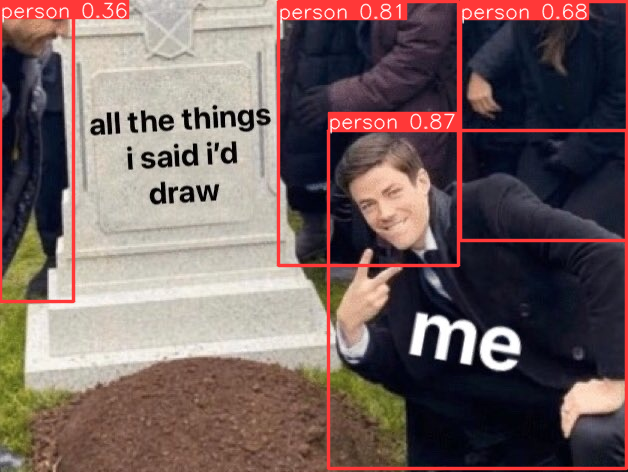

In [2]:
import torch

os.chdir(r'C:\Users\halloween\Downloads\explo')

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5n - yolov5x6, custom

# Images
img = 'https://pbs.twimg.com/media/Fih7-06X0AATCE4?format=jpg&name=small'  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.
results.show()

In [ ]:
import json

path_containing_files = r'C:\Users\halloween\Downloads\explo'
os.chdir(path_containing_files)

def detect(filename):
    """Returns: filename - detection1, detection2, etc."""

    # Exclude generated files
    if "tmp" in filename and "dzx" in filename:
        return
    elif "yolo" in filename and ".pt" in filename:
        return

    # Inference
    try:
        results = model(filename)
    except Exception as e:
        return f"{filename} - {e.__class__}: {e}"
    
    # Results
    res_json = results.pandas().xyxy[0].to_json(orient="records")
    predictions = json.loads(res_json)
    prediction_names = [pred['name'] for pred in predictions]
    if prediction_names.count('person') > 3:
        prediction_names.append('people')
    prediction_names = set(prediction_names)
    
    return f"{filename} - {' '.join(prediction_names)}"

In [ ]:
for f in os.listdir():
    print(detect(f))